**21/11 : finalement on va faire le camembert en fonction des temps de cuisson. On va prendre les intervalles : 0-5min, 5-10, 10-15 ... jusqu'à ? On va stocker les pourcentages et les top 10 recettes pour chaque saison dans une database très réduite qu'on va utiliser lors de l'affichage**

In [85]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from datetime import datetime, date 
import matplotlib.dates as mdates
import pickle

1. temps de recette max 

In [86]:
df = pd.read_csv("../../data/archive/RAW_recipes.csv")

df['submitted'] = pd.to_datetime(df['submitted'], errors='coerce')
#print(df[df['id']==137739].iloc[0]) #Comme ça qu'on prend une ligne selon l'id ! 
#print(df.columns)
times = df['minutes']

ids = df['id']
vector_id = ids.to_numpy()
#print(vector_id)


##print(times)
vector = times.to_numpy()
#print(vector)

#dictionnaire_minutes = {} #clé = id, valeur = temps de cuisson
dictionnaire_minutes =  {}

j=0
for i in vector_id :
    #dictionnaire_minutes[i] = df[df['id'] == i ]['minutes'].iloc[0]
    dictionnaire_minutes[i] = vector[j]
    j+=1

#print(dictionnaire_minutes)
#print(dictionnaire_minutes_methode2)

#print('les deux dictionnaires sont-ils identiquent ? :',dictionnaire_minutes == dictionnaire_minutes_methode2 ) #Vraie !! donc on prend la méthode 2 , qui est bien plus rapide (2s au lieu de 30s)


In [87]:
print(list(dictionnaire_minutes.values())[:100])


[55, 30, 130, 45, 190, 0, 15, 120, 180, 70, 5, 1460, 2970, 525, 5, 500, 45, 15, 70, 110, 45, 55, 35, 20, 25, 10, 40, 495, 40, 90, 70, 55, 13, 26, 10, 12, 50, 30, 30, 45, 18, 35, 45, 35, 25, 15, 45, 230, 50, 35, 14450, 90, 70, 35, 40, 25, 25, 30, 20160, 15, 25, 15, 10, 125, 120, 10, 20, 5, 135, 90, 120, 70, 40, 28, 60, 30, 25, 20, 120, 160, 135, 1470, 45, 45, 5, 90, 65, 70, 150, 10, 75, 35, 150, 15, 45, 70, 90, 2, 40, 32]


top 3 temps : (261647, 2147483647), (447963, 1051200), (291571, 288000)

In [88]:
top = sorted(dictionnaire_minutes.items(),key =lambda x : x[1], reverse = True) #Liste des mots les plus utilisés
#print(top)
print(df[df['id']==261647]['minutes'].iloc[0])

2147483647


Boite à moustache pour enlever les recettes qui ont des valeurs temps de cuisson absurdes 

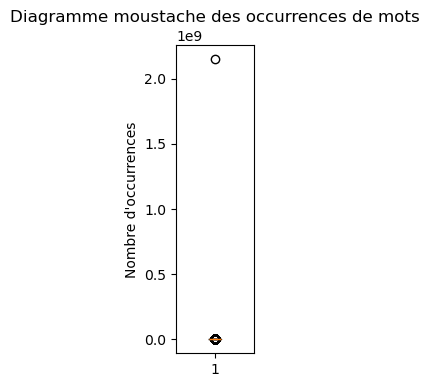

In [89]:
# Extraire les occurrences et les mots
occurrences_values = list(dictionnaire_minutes.values())
mots = list(dictionnaire_minutes.keys())

# Créer le diagramme en boîte (boxplot)
fig, ax = plt.subplots()
fig.set_size_inches(1, 4)
ax.boxplot(occurrences_values)

# Calculer la position des points extrêmes
outliers = ax.lines[5].get_ydata()

# Afficher les mots associés aux outliers (valeurs extrêmes)
for outlier in outliers:
    # Trouver le mot correspondant à la valeur d'occurrence
    mot_associe = [mot for mot, count in dictionnaire_minutes.items() if count == outlier]

# Ajouter un titre et des labels
plt.title('Diagramme moustache des occurrences de mots')
plt.ylabel('Nombre d\'occurrences')

# Afficher le diagramme
plt.show()

In [90]:
#On enlève au dessus de  1000 min on garde toutes les recettes de moins de 24h (mijotage) et = à 0 min 
l = [] #liste des ids à enlever 
for i in dictionnaire_minutes.keys() :
    if dictionnaire_minutes[i] > 1000 :
        l.append(i)
    if dictionnaire_minutes[i] == 0 : #On supprime aussi les valeurs à 0 min
        l.append(i)

for i in l :
    del dictionnaire_minutes[i]

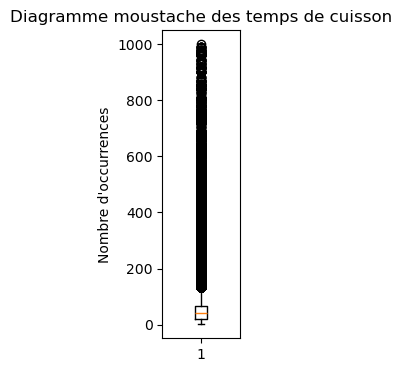

In [91]:
#On refait un moustache pour voir ce que ça donne 

# Extraire les occurrences et les mots
occurrences_values = list(dictionnaire_minutes.values())
mots = list(dictionnaire_minutes.keys())

# Créer le diagramme en boîte (boxplot)
fig, ax = plt.subplots()
fig.set_size_inches(1, 4)
ax.boxplot(occurrences_values)

# Calculer la position des points extrêmes
outliers = ax.lines[5].get_ydata()

# Afficher les mots associés aux outliers (valeurs extrêmes)
for outlier in outliers:
    # Trouver le mot correspondant à la valeur d'occurrence
    mot_associe = [mot for mot, count in dictionnaire_minutes.items() if count == outlier]

# Ajouter un titre et des labels
plt.title('Diagramme moustache des temps de cuisson')
plt.ylabel('Nombre d\'occurrences')

# Afficher le diagramme
plt.show()

On fera une seule catégorie pour les valeurs au dessus de  200 

Rq : je vais construire le df avec la saison en dernière colonne, je vais trop en avoir besoin. Je peux faire 2 dicos : id-saison et id-temps de cuisson. J'ignore comment je vais faire un petit dataframe après ça, je pense l'appeller minutes_cursor_df, avec une nouvelle colonne pour l'intervalle du temps de cuisson. Pck ce qui nous intéresse c'est le nombre de recettes après tout, puis on peut toujours les afficher si on a les ids 


In [92]:
df['saison'] = 'None'
l = df['id'].to_numpy() #liste ids

#On transforme les datetimes en tuple (jour,mois)
df['submitted'] = df['submitted'].apply(lambda x: (x.day, x.month))


In [93]:
print(l)

[137739  31490 112140 ... 308080 298512 298509]


In [94]:
print(df['submitted'])

print(df['submitted'][0][1])

#Ok ça marche 

print(df[df['id']==137739]['submitted'].iloc[0]) #Ca marche !!!

0          (16, 9)
1          (17, 6)
2          (25, 2)
3          (14, 4)
4         (25, 10)
            ...   
231632     (29, 8)
231633      (9, 1)
231634      (7, 6)
231635     (15, 4)
231636     (15, 4)
Name: submitted, Length: 231637, dtype: object
9
(16, 9)


Est-ce qu'on récupérerait pas toutes les dates dans une liste comme ça tout est plus facile d'accès ? l liste des ids et genre dates liste des dates. Ensuite on fait j=0, on prnd l[j] et dates[j] puis j+= 1 ? et filtre sur df[id]==l[j] pour ajouter la saison sur la bonne ligne. On essaie : 

In [95]:
dates = df.loc[df['id'].isin(l), 'submitted'].tolist() #Jsp comment ça marche mais ça marche 


In [96]:
j=0
for i in dates :
    saison = 'none'
    if 3 > i[1] :
        saison = 'Hiver'
    if 3 == i[1] :
        if 19 >= i [0] :
             saison = 'Hiver'
        else : 
            saison = 'Printemps'
    if 3 < i[1] < 6 :
        saison = 'Printemps'
    if i[1] == 6 :
        if 20 >= i[0] :
            saison = 'Printemps'
        else : 
            saison = 'Ete'
    if 6 < i[1] < 9 :
        saison = 'Ete'
    if i[1] == 9 :
        if 22 >= i[0] :
            saison = 'Ete'
        else : 
            saison = 'Automne'
    if 9 < i[1] < 12 : 
        saison = 'Automne'
    if i[1] == 12 :
        if 20 >= i[0] :
             saison = 'Automne'
        else : 
            saison = 'Hiver'

    df.loc[df['id'] == l[j], 'saison'] = saison
    j+=1



#Pas le plus rapide, mais marche. On peut créer des fonctions et faire un .apply(func), ce qui est très fort 

In [97]:
print(df[df['id']==31490]['submitted'].iloc[0])
print(df[df['id']==31490]['saison'].iloc[0])

(17, 6)
Printemps


Maintenat on va créer le dataframe curosr_df

In [98]:
intervals = [f"{i}-{i+5} minutes" for i in range(0, 20, 5)] + \
            [f"{i}-{i+10} minutes" for i in range(20, 60, 10)] + \
            ["1-2h", "2-3h", "au dessus de 3h"]

print(df['minutes'].dtype)

int64


In [155]:
df_pivot = pd.DataFrame({
    'intervalle': [i for i in range(182)],
    'Printemps': [0 for i in range(182)],
    'Hiver': [0 for i in range(182)],
    'Ete': [0 for i in range(182)],
    'Automne': [0 for i in range(182)],
}) #On initialise avec des valeurs aléatoires 

In [156]:
print(df_pivot.head())

print(df_pivot[df_pivot['intervalle'] == 5]['Printemps'].iloc[0]) #Ca ca renvoit la valeur pour tel intervalle et tel saison. Maintenant il y a plus qu'à compter 

   intervalle  Printemps  Hiver  Ete  Automne
0           0          0      0    0        0
1           1          0      0    0        0
2           2          0      0    0        0
3           3          0      0    0        0
4           4          0      0    0        0
0


In [157]:
Liste_saisons = ['Hiver','Ete','Automne','Printemps']
liste_cook_times = [i for i in range(1,182)] #Un peu mal dit mais bon 

In [158]:
#Maintenant l'étape difficile

for i in Liste_saisons :
    for j in range(len(liste_cook_times)) :
        if(j==0) :
            count = df[(df['saison'] == i) & (df['minutes'] <= liste_cook_times[j])]
        elif j < len(liste_cook_times)-1:
            count = df[(df['saison'] == i) & (liste_cook_times[j-1]<= df['minutes'] ) & (df['minutes'] <= liste_cook_times[j])]
        else : 
            count = df[(df['saison'] == i) & (df['minutes'] >= liste_cook_times[-1] )]
            print(f"[DEBUG] Saison: {i}, Intervalle: >= {liste_cook_times[-1]}, Lignes trouvées: {count.shape[0]}")

        df_pivot.loc[df_pivot['intervalle'] == liste_cook_times[j], i] = count.shape[0]



print(df_pivot)

[DEBUG] Saison: Hiver, Intervalle: >= 181, Lignes trouvées: 4595
[DEBUG] Saison: Ete, Intervalle: >= 181, Lignes trouvées: 4140
[DEBUG] Saison: Automne, Intervalle: >= 181, Lignes trouvées: 4339
[DEBUG] Saison: Printemps, Intervalle: >= 181, Lignes trouvées: 4314
     intervalle  Printemps  Hiver   Ete  Automne
0             0          0      0     0        0
1             1        161    411   312      752
2             2        677    545   660      548
3             3        864    667   838      662
4             4        494    429   466      367
..          ...        ...    ...   ...      ...
177         177          2      0     0        2
178         178          1      0     2        1
179         179          0      0     2        0
180         180        176    195   151      177
181         181       4314   4595  4140     4339

[182 rows x 5 columns]


In [159]:
#Pourcentages 

# Pour chaque saison, calcule le pourcentage des recettes dans chaque intervalle
for saison in ['Printemps', 'Hiver', 'Ete', 'Automne']:
    # Ajoute une nouvelle colonne pour les pourcentages
    df_pivot[f'{saison}_%'] = (df_pivot[saison] / df_pivot[['Printemps', 'Hiver', 'Ete', 'Automne']].sum(axis=1)) * 100

# Affiche le résultat
print(df_pivot)

     intervalle  Printemps  Hiver   Ete  Automne  Printemps_%    Hiver_%  \
0             0          0      0     0        0          NaN        NaN   
1             1        161    411   312      752     9.841076  25.122249   
2             2        677    545   660      548    27.860082  22.427984   
3             3        864    667   838      662    28.505444  22.005939   
4             4        494    429   466      367    28.132118  24.430524   
..          ...        ...    ...   ...      ...          ...        ...   
177         177          2      0     0        2    50.000000   0.000000   
178         178          1      0     2        1    25.000000   0.000000   
179         179          0      0     2        0     0.000000   0.000000   
180         180        176    195   151      177    25.178827  27.896996   
181         181       4314   4595  4140     4339    24.810214  26.426271   

          Ete_%  Automne_%  
0           NaN        NaN  
1     19.070905  45.965770  


Sauvegarde de la table

In [165]:
df_pivot = df_pivot.fillna(0)

df_pivot.to_pickle("webapp_assets/cursor.pkl")

In [166]:
print(df_pivot.isna().any())

intervalle     False
Printemps      False
Hiver          False
Ete            False
Automne        False
Printemps_%    False
Hiver_%        False
Ete_%          False
Automne_%      False
dtype: bool
